Parisa Kamizi Assignment 3.1

# ADS 509 Module 3: Group Comparison 

The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

This assignment asks you to analyze the lyrics and Twitter descriptions for the two artists you selected in Module 1. If the results from that pull were not to your liking, you are welcome to use the zipped data from the “Assignment Materials” section. Specifically, you are asked to do the following: 

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set. 
* Calculate descriptive statistics on the two sets of lyrics and compare the results. 
* For each of the four corpora, find the words that are unique to that corpus. 
* Build word clouds for all four corpora. 

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization). 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [58]:
# ChatGPT was utilized on the assignment as a learning tool. 

import os
import re
import emoji
import pandas as pd

#!pip install wordcloud

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


In [60]:
# Use this space for any additional import statements you need
from itertools import chain


In [62]:
# Resources can be found --> Module 2 Assignment 

# Place any addtional functions or constants you need here. 

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
sw = stopwords.words("english")

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# It's handy to have a full set of emojis
all_language_emojis = set()

for country in emoji.EMOJI_DATA : 
    for em in emoji.EMOJI_DATA[country] : 
        all_language_emojis.add(em)

# and now our functions
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of 
    """

    # Place your Module 2 solution here

     # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = len(set(tokens))/len(tokens)
    num_characters = len("".join(tokens))
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    
    #return(0)


    
def contains_emoji(s):
    
    s = str(s)
    emojis = [ch for ch in s if emoji.is_emoji(ch)]

    return(len(emojis) > 0)


def remove_stop(tokens) :
    # modify this function to remove stopwords
    #return(tokens)
    return([t for t in tokens if t.lower() not in sw])
 
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    
    # modify this function to return tokens
    #return(text)
    return("".join([ch for ch in text if ch not in punct_set]))

def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)


## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [65]:
# Feel free to use the below cells as an example or read in the data in a way you prefer

#data_location = "" # change to your location if it is not in the same directory as your notebook
data_location = "/Users/parisakamizi/Desktop/ADS509/Module Two/"
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

artist_files = {'cher':'cher_followers_data.txt',
                'robyn':'robynkonichiwa_followers_data.txt'}


In [67]:
twitter_data = pd.read_csv(data_location + twitter_folder + artist_files['cher'],
                           sep="\t",
                           quoting=3)

twitter_data['artist'] = "cher"

In [68]:
twitter_data_2 = pd.read_csv(data_location + twitter_folder + artist_files['robyn'],
                             sep="\t",
                             quoting=3)
twitter_data_2['artist'] = "robyn"

twitter_data = pd.concat([
    twitter_data,twitter_data_2])
    
del(twitter_data_2)

#print("Twitter Data:")
#twitter_data.head()

In [71]:
# Resources can be found --> Module 2 assignment
# https://stackoverflow.com/questions/51491931/reading-text-files-from-subfolders-and-folders-and-creating-a-dataframe-in-panda?utm_source=chatgpt.com
# and https://www.geeksforgeeks.org/how-to-read-multiple-data-files-into-pandas/?utm_source=chatgpt.com

# Load lyrics in a directory
def load_lyrics_from_directory(directory):
    lyrics = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.txt'):
                with open(os.path.join(subdir, file), 'r') as f:
                    lyrics.append(f.read())
    return lyrics

# Paths to lyrics folders
cher_lyrics_path = os.path.join(data_location, lyrics_folder, "cher")
robyn_lyrics_path = os.path.join(data_location, lyrics_folder, "robyn")

# Read lyrics data
cher_lyrics = load_lyrics_from_directory(cher_lyrics_path)
robyn_lyrics = load_lyrics_from_directory(robyn_lyrics_path)

# Create DataFrame for lyrics
lyrics_data = pd.DataFrame({
    'artist': ['Cher'] * len(cher_lyrics) + ['Robyn'] * len(robyn_lyrics),
    'lyrics': cher_lyrics + robyn_lyrics
})

#print("\nLyrics Data:")
#lyrics_data.head()


## Tokenization and Normalization

In this next section, tokenize and normalize your data. We recommend the following cleaning. 

**Lyrics** 

* Remove song titles
* Casefold to lowercase
* Remove stopwords (optional)
* Remove punctuation
* Split on whitespace

Removal of stopwords is up to you. Your descriptive statistic comparison will be different if you include stopwords, though TF-IDF should still find interesting features for you. Note that we remove stopwords before removing punctuation because the stopword set includes punctuation.

**Twitter Descriptions** 

* Casefold to lowercase
* Remove stopwords
* Remove punctuation other than emojis or hashtags
* Split on whitespace

Removing stopwords seems sensible for the Twitter description data. Remember to leave in emojis and hashtags, since you analyze those. 

In [74]:
# Resources can be found --> Module 2 Assignment

# Step 1: Punctuation and Stopwords Settings
punctuation = set(punctuation) - {"#"}

# Load English stopwords using NLTK
sw = set(stopwords.words("english"))

# Step 2: Remove Song Titles
def remove_song_titles(text):
    """
    Removes the first line of the text, assuming it's the song title.
    """
    lines = text.split('\n')
    return '\n'.join(lines[1:]) if len(lines) > 1 else text

# Step 3: Convert to Lowercase (Casefold)
def to_lowercase(text):
    """
    Converts text to lowercase using casefold for normalization.
    """
    return text.casefold()

# Step 4: Remove Punctuation
def remove_punctuation(text, punct_set=punctuation):
    """
    Removes punctuation from the text.
    """
    return "".join([ch for ch in text if ch not in punct_set])

# Step 5: Split Text into Tokens
def tokenize(text):
    """
    Tokenizes the text by splitting on whitespace.
    """
    return re.split(r"\s+", text)

# Step 6: Remove Stopwords (Optional)
def remove_stop(tokens):
    """
    Removes stopwords from a list of tokens.
    """
    return [token for token in tokens if token.lower() not in sw]

# Step 7: Remove Empty Tokens
def remove_empty(tokens):
    """
    Removes empty strings from a list of tokens.
    """
    return [token for token in tokens if token.strip()]

# Step 8: Prepare Text Using a Pipeline
def prepare(text, pipeline):
    """
    Applies a list of transformations (pipeline) to the text sequentially.
    Converts non-string input to an empty string.
    """
    if not isinstance(text, str):
        text = ""  # Handle non-string values, like NaN or float
    for transform in pipeline:
        text = transform(text)
    return text

# Define the full pipeline including all cleaning steps
my_pipeline = [str.lower, remove_song_titles, to_lowercase, remove_punctuation, tokenize, remove_stop, remove_empty]        


lyrics_data["tokens"] = lyrics_data["lyrics"].apply(prepare,pipeline=my_pipeline)
lyrics_data["num_tokens"] = lyrics_data["tokens"].map(len) 

twitter_data["tokens"] = twitter_data["description"].apply(prepare,pipeline=my_pipeline)
twitter_data["num_tokens"] = twitter_data["tokens"].map(len) 


In [75]:
twitter_data['has_emoji'] = twitter_data["description"].apply(contains_emoji)

Let's take a quick look at some descriptions with emojis.

In [77]:
twitter_data[twitter_data.has_emoji].sample(10)[["artist","description","tokens"]]

,artist,description,tokens
483391,cher,Mother of a 2 yr princess who is my life ♥️ ca...,"[mother, 2, yr, princess, life, ♥️, cashapp, a..."
2890864,cher,Musician. ♍️,"[musician, ♍️]"
232533,robyn,"underground،'٣🚩 27.9.98 Libra Girl♎ Student,Fa...","[underground،٣🚩, 27998, libra, girl♎, studentf..."
3989,cher,daydreamer 🚀,"[daydreamer, 🚀]"
1980828,cher,"Health Care Aide, Clinical Instructor, Retro D...","[health, care, aide, clinical, instructor, ret..."
1703687,cher,29/Shy Irish army💜OT7,"[29shy, irish, army💜ot7]"
2776794,cher,Nobody’s Perfect. Make It Count. Always the Ho...,"[nobody’s, perfect, make, count, always, hours..."
1288693,cher,🌿InspirationalInfluencer. 💕 Dog lover Dog 🐕 Ge...,"[🌿inspirationalinfluencer, 💕, dog, lover, dog,..."
1312749,cher,🌚 wassssuppp,"[🌚, wassssuppp]"
1407351,cher,I luv my BFFs I luv my school I luv to travel ...,"[luv, bffs, luv, school, luv, travel, family, ..."


With the data processed, we can now start work on the assignment questions. 

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

A: One improvement could be handling contractions like "I've" by splitting it into "I" and "have" for better clarity. Another is using lemmatization to standardize words like "better", "sings" to "good,", "sing" improving consistency.


## Calculate descriptive statistics on the two sets of lyrics and compare the results. 


In [80]:
# Resources can be found from --> Module 2 Assignment
# and https://www.nltk.org/api/nltk.tokenize.html

def descriptive_stats(tokens, num_tokens=10):
    """
    Generate descriptive statistics for a list of tokens.
    """
    if not tokens:
        return {
            "total_tokens": 0,
            "unique_tokens": 0,
            "lexical_diversity": 0,
            "most_common_tokens": [],
            "total_characters": 0
        }
    
    total_tokens = len(tokens)
    unique_tokens = len(set(tokens))
    lexical_diversity = len(set(tokens))/len(tokens)
    most_common_tokens = Counter(tokens).most_common(num_tokens)
    
    # Count the total number of characters in the tokens
    total_characters = sum(len(token) for token in tokens)

    return {
        "total_tokens": total_tokens,
        "unique_tokens": unique_tokens,
        "lexical_diversity": lexical_diversity,
        "most_common_tokens": most_common_tokens,
        "total_characters": total_characters
    }

lyrics_cher = lyrics_data[lyrics_data.artist == "Cher"].tokens.to_list()
cher_tokens = [token for sublist in lyrics_cher for token in sublist]  

lyrics_robyn = lyrics_data[lyrics_data.artist == "Robyn"].tokens.to_list()
robyn_tokens = [token for sublist in lyrics_robyn for token in sublist]   

# Calculate descriptive statistics for Cher and Robyn
cher_stats = descriptive_stats(cher_tokens, num_tokens=10)
robyn_stats = descriptive_stats(robyn_tokens, num_tokens=10)

def print_stats(stats, artist_name):
    print(f"{artist_name} Lyrics Statistics:")
    print(f"  Total Tokens: {stats['total_tokens']}")
    print(f"  Unique Tokens: {stats['unique_tokens']}")
    print(f"  Lexical Diversity: {stats['lexical_diversity']:.3f}")
    print(f"  Total Characters: {stats['total_characters']}")  
    print("  Most Common Tokens:")
    for token, count in stats["most_common_tokens"]:
        print(f"    '{token}': {count}")  
    print("\n")

# Print the results
print_stats(cher_stats, "Cher")
print_stats(robyn_stats, "Robyn")


Cher Lyrics Statistics:
  Total Tokens: 35233
  Unique Tokens: 3684
  Lexical Diversity: 0.105
  Total Characters: 169244
  Most Common Tokens:
    'love': 966
    'im': 511
    'know': 480
    'dont': 430
    'youre': 332
    'baby': 315
    'time': 313
    'see': 308
    'oh': 306
    'one': 275


Robyn Lyrics Statistics:
  Total Tokens: 15041
  Unique Tokens: 2139
  Lexical Diversity: 0.142
  Total Characters: 72804
  Most Common Tokens:
    'know': 305
    'im': 299
    'dont': 297
    'love': 269
    'got': 249
    'like': 230
    'baby': 220
    'youre': 169
    'never': 155
    'dance': 148




Q: what observations do you make about these data? 

A: Cher has more total tokens (35,233 vs. 15,041) and unique tokens (3,684 vs. 2,139) compared to Robyn, indicating that Cher's lyrics corpus is larger and uses a wider range of words.
However, Cher’s lexical diversity is lower (0.105 vs. 0.142), suggesting Robyn’s lyrics are more varied in vocabulary.
Cher's lyrics are more repetitive, with the word "love" appearing 966 times, compared to 269 times in Robyn's lyrics, indicating a focus on certain common themes.


## Find tokens uniquely related to a corpus

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents (if we view each data source as a single document) or too many (if we view each description as a separate document). In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis. 

To avoid these problems, we will create a custom statistic to identify words that are uniquely related to each corpus. The idea is to find words that occur often in one corpus and infrequently in the other(s). Since corpora can be of different lengths, we will focus on the _concentration_ of tokens within a corpus. "Concentration" is simply the count of the token divided by the total corpus length. For instance, if a corpus had length 100,000 and a word appeared 1,000 times, then the concentration would be $\frac{1000}{100000} = 0.01$. If the same token had a concentration of $0.005$ in another corpus, then the concentration ratio would be $\frac{0.01}{0.005} = 2$. Very rare words can easily create infinite ratios, so you will also add a cutoff to your code so that a token must appear at least $n$ times for you to return it. 

An example of these calculations can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1P87fkyslJhqXFnfYezNYrDrXp_GS8gwSATsZymv-9ms). Please don't hesitate to ask questions if this is confusing. 

In this section find 10 tokens for each of your four corpora that meet the following criteria: 

1. The token appears at least `n` times in all corpora
1. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.

In [227]:
# your code here
# Resources can be found from --> Class presentation
# https://www.nltk.org/book/
# https://www.geeksforgeeks.org/tokenize-text-using-nltk-python/
# https://docs.python.org/3/library/collections.html#collections.Counter
# https://docs.python.org/3/tutorial/datastructures.html#sets
# https://stackoverflow.com/questions/8966538/syntax-behind-sortedkey-lambda
# https://blogboard.io/blog/knowledge/python-sorted-lambda/
# and Module 2 assignment

# Input data for artists 
cher_tweet_tokens = twitter_data[twitter_data.artist == "cher"].tokens.to_list()
cher_tweet_tokens = [item for sublist in cher_tweet_tokens for item in sublist]

robyn_tweet_tokens = twitter_data[twitter_data.artist == "robyn"].tokens.to_list()
robyn_tweet_tokens = [item for sublist in robyn_tweet_tokens for item in sublist]

# Create Counters
cher_lyrics_token_counts = Counter(cher_lyrics)
cher_tweet_token_counts = Counter(cher_tweet_tokens)
robyn_lyrics_token_counts = Counter(robyn_lyrics)
robyn_tweet_token_counts = Counter(robyn_tweet_tokens)

#find common token
valid_tokens = {w for w, c in cher_lyrics_token_counts.items() if c >= 5}

for token_count in [cher_tweet_token_counts, robyn_lyrics_token_counts, robyn_tweet_token_counts]:
    valid_tokens = valid_tokens.intersection({w for w, c in token_count.items() if c >= 5})
    
def get_top_tokens(token_counts, corpora_counters, valid_tokens, top_n=10):
    aggregated_corpora_counts = Counter()

    for corpora_counter in corpora_counters:
        aggregated_corpora_counts.update(corpora_counter)

    token_frequencies = defaultdict(float)
    
    for token, count in token_counts.items():
        if token in valid_tokens:
            token_frequencies[token] = count / aggregated_corpora_counts[token]

    sorted_tokens = sorted([(token, ratio) for token, ratio in token_frequencies.items()],
                           key=lambda x: x[1], reverse=True)
    
    return sorted_tokens[:top_n]

top_tokens_cher_lyrics = get_top_tokens(cher_lyrics_token_counts, 
                                                     [cher_tweet_token_counts, robyn_lyrics_token_counts, robyn_tweet_token_counts], 
                                                     valid_tokens)
print("\nTop tokens in Cher's lyrics compared to tweets and Robyn's lyrics/tweets:")
print(top_tokens_cher_lyrics)

top_tokens_robyn_lyrics = get_top_tokens(robyn_lyrics_token_counts, 
                                                      [cher_tweet_token_counts, cher_lyrics_token_counts, robyn_tweet_token_counts], 
                                                      valid_tokens)
print("\nTop tokens in Robyn's lyrics compared to tweets and Cher's lyrics/tweets:")
print(top_tokens_robyn_lyrics)

top_tokens_cher_tweets = get_top_tokens(cher_tweet_token_counts, 
                                                     [cher_lyrics_token_counts, robyn_lyrics_token_counts, robyn_tweet_token_counts], 
                                                     valid_tokens)
print("\nTop tokens in Cher's tweets compared to lyrics and Robyn's tweets/lyrics:")
print(top_tokens_cher_tweets)

top_tokens_robyn_tweets = get_top_tokens(robyn_tweet_token_counts, 
                                                      [cher_lyrics_token_counts, cher_tweet_token_counts, robyn_lyrics_token_counts], 
                                                      valid_tokens)
print("\nTop tokens in Robyn's tweets compared to lyrics and Cher's tweets/lyrics:")
print(top_tokens_robyn_tweets)



Top tokens in Cher's lyrics compared to tweets and Robyn's lyrics/tweets:
[('ooh', 0.43795620437956206), ('chorus', 0.33707865168539325), ('knock', 0.145748987854251), ('tonight', 0.12629399585921325), ('ohh', 0.10084033613445378), ('ooo', 0.09836065573770492), ('tears', 0.09268292682926829), ('gonna', 0.06017891027378693), ('deny', 0.05755395683453238), ('gotta', 0.0574468085106383)]

Top tokens in Robyn's lyrics compared to tweets and Cher's lyrics/tweets:
[('chorus', 0.3149171270718232), ('ooo', 0.09836065573770492), ('ohh', 0.09166666666666666), ('beat', 0.08070757324488667), ('88', 0.07865168539325842), ('ooh', 0.07065217391304347), ('deny', 0.06521739130434782), ('itll', 0.059907834101382486), ('crash', 0.05142857142857143), ('alright', 0.046153846153846156)]

Top tokens in Cher's tweets compared to lyrics and Robyn's tweets/lyrics:
[('god', 26.842227378190255), ('proud', 25.343698854337152), ('faith', 22.67132867132867), ('friend', 22.27148703956344), ('woman', 21.8898601398601

Q: What are some observations about the top tokens? Do you notice any interesting items on the list? 

A: 
* Cher's lyrics feature high-frequency words- or some emotional expression words like "ooh" (0.438) and "ohh" (0.100), while Robyn uses "ooo" (0.098) and "ooh" (0.071). 

* Cher's tokens like "god" (26.842) and "proud" (25.344) emphasize empowerment, while "friend" (22.271) and "mama" (17.824) focus on relationships.

* Robyn's lyrics highlight dance with "beat" (0.080).

## Build word clouds for all four corpora. 

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found [here](https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb). If you haven't already, you should absolutely clone the repository that accompanies the book. 


In [25]:
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

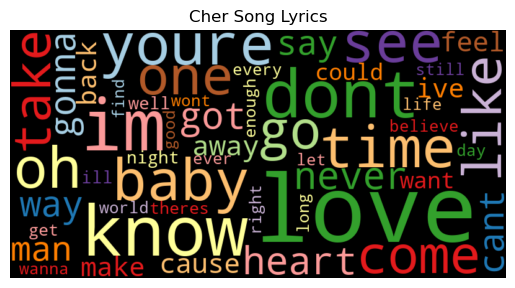

In [26]:
# Resources can be found --> https://medium.com/@m3redithw/wordclouds-with-python-c287887acc8b

cher_count = count_words(lyrics_data[lyrics_data['artist'] == 'Cher'])
robyn_count = count_words(lyrics_data[lyrics_data['artist'] == 'Robyn'])
wordcloud(cher_count['freq'], title="Cher Song Lyrics", max_words=50, stopwords=None)

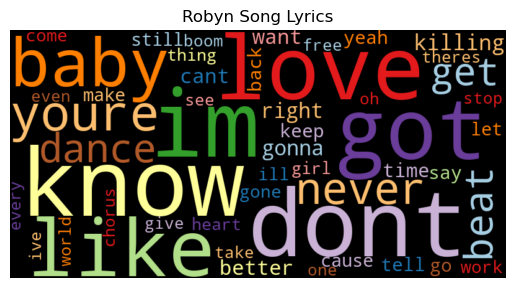

In [27]:
wordcloud(robyn_count['freq'], title="Robyn Song Lyrics", max_words=50, stopwords=None)

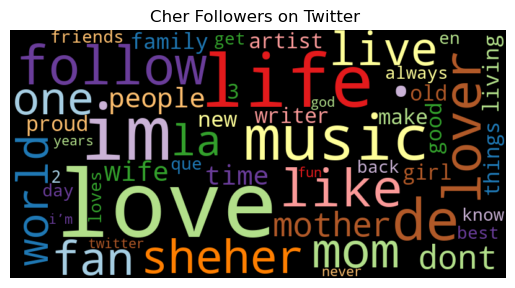

In [28]:
cher_count_twitter = count_words(twitter_data[twitter_data['artist']=="cher"])
robyn_count_twitter = count_words(twitter_data[twitter_data['artist']=="robyn"])
wordcloud(cher_count_twitter['freq'], title="Cher Followers on Twitter ",max_words=50, stopwords=None)

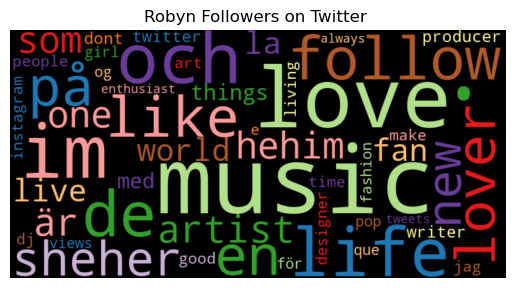

In [29]:
wordcloud(robyn_count_twitter['freq'], title="Robyn Followers on Twitter ",max_words=50, stopwords=None)

Q: What observations do you have about these (relatively straightforward) wordclouds? 

A: 
* Robyn's song lyrics focus on emotional themes, with frequent words like "love," "don't," and "baby."
* Cher’s song lyrics emphasize themes of love and time, with words like "love," "know," and "come."
* On Twitter, both artists' followers engage with words like "follow," "like," and "life," reflecting casual interaction and emotional connection.








In [229]:
!jupyter nbconvert --to html "/Users/parisakamizi/ADS-509 Text Mining/Group Comparison.ipynb"


[NbConvertApp] Converting notebook /Users/parisakamizi/ADS-509 Text Mining/Group Comparison.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 939939 bytes to /Users/parisakamizi/ADS-509 Text Mining/Group Comparison.html
